# Final Project from "Applied Probability and Statistics" - Romario Stankovic 2020230210

## Instructions:

### 1.
Each student should find, according to the individual interests, a dataset on which she/he will 
apply adequate methods of statistical reasoning, learnt during the course (all the students 
should choose **different datasets**). Datasets can be found e.g. using the new google dataset 
search engine: https://toolbox.google.com/datasetsearch, or directly from the popular 
websites e.g.: https://www.kaggle.com/, https://archive.ics.uci.edu/ml/datasets.html,
https://datahack.analyticsvidhya.com/contest/all/ ...

The chosen dataset should have **at least 3 dependent variables** (columns in Pandas DataFrame
structure).

### 2.
Based on the initial analysis of data, the students should make an assessment of which statistical 
characteristics of the data would be the most interesting and useful to obtain. Based on that, 
each student should choose at least 5 of the following statistical methods (covered during the 
course) to extract the wanted information: 

**Application of regression analysis (linear, multiple, as well as nonlinear (e.g polynomial)) is mandatory!**

The rest (as least 4) methods should be chosen from the following list (other methods, not 
covered during the course (e.g. more advanced machine learning methods), are also 
acceptable):
- Estimation of the unconditional and conditional probabilities,
- Estimation of the parameters of distributions of single variables (mathematical 
expectation, variance, standard deviation, median, quartiles, quantiles,...),
- Estimation of the parameters of the joint distributions (covariance, correlation 
coefficient),
- Estimation of PDF based on histogram, and nonparametric hypothesis testing of 
distributions using Kolmogorov-Smirnov and/or chi-squared test,
- Estimation of confidence intervals of certain parameters,
- Parametric hypothesis testing.

### 3.
Results of the project should be contained in one Jupyter Notebook (.ipynb) file, and will be 
orally defended (5-10 min).

## Dataset:

The dataset used for this project is the "Admission in the University" dataset. This dataset contains 9 columns and 400 rows. The columns are as follows:

- Serial No. - The serial number of the student
- GRE Score - The GRE score of the student
- TOEFL Score - The TOEFL score of the student
- University Rating - The rating of the university the student applied to (0-5)
- SOP - The Statement of Purpose score of the student (0-5)
- LOR - The Letter of Recommendation score of the student (0-5)
- CGPA - The Cumulative Grade Point Average of the student (0-10)
- Research - The research experience of the student (0-1)
- Change of Admit - The change of admit of the student (0-1)

This dataset can be found on the following link: https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

## Exploratory Data Analysis (EDA):

### Loading the dataset:

The dataset is loaded from a .csv file which can be found on the link provided above.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm

# Use seaborn style
sns.set()

In [2]:
# Load the data
data = pd.read_csv('adm_data.csv')

### Analyzing the dataset:

After loading the data, we should do general analysis of the dataset. We will check the shape of the data, show missing values, unique values and display some statistical information about the data.

#### Shape

The shape represents the number of columns and rows in the dataset. The more columns and rows, the more data we have to work with and the more accurate our results will be.

In [3]:
# Print the shape
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 400, Columns: 9


#### Column names

Printing the column names of the dataset will help us decide which columns we will use for our analysis and which will be discarded.

In [4]:
# Print the name of the columns
print(f"Columns: {[name for name in data.columns]}")

Columns: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


#### Column data types

Knowing the data types of the columns will show us which columns we can use for our analysis and which we can't. Usually text columns are categorical and should be converted to numerical values or discarded in the case the data does not have any statistical value to us.

In [5]:
# Print the data types
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

#### Printing the first 10 rows

Visualizing a couple of samples from the dataset will help us understand the data better. We can see the values stored in each column and maybe find some interesting patterns.

In [6]:
# Print first 10 rows
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


#### NULL values

NULL values can be a problem when we are doing analysis on the data. We can't use NULL values in our analysis so we need to find a way to deal with them. We can either remove the rows with NULL values or replace them with some other value (e.g. the mean of the column).

In [7]:
# Print number of null values in each column
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Unique values

Knowing the unique values in each column will help us understand the data better. By having less unique values in a column we can determine that it is a categorical column and by having more unique values we can determine that it is a numerical column.

In [8]:
# Print number of unique values in each column
data.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

#### Statistical summary

Statistical summary of the data gives us a general idea about the characteristics of the features. We can see the mean, standard deviation, minimum and maximum values as well as quartiles of each column.

In [9]:
# Show a table with statistics for each column
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Data preparation

After analyzing the data, we can start preparing it for analysis. Here we remove columns that have no statistical characteristics and remove of fill null values

In [10]:
# Drop the Serial No. column
data.drop(['Serial No.'], axis=1, inplace=True)

In [11]:
# Fix names of certain columns
data.rename(columns={'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)

### Visualization

Visualizing the frequency of values, median, mean and mode values will help us determine the distribution of the data. We can also visualize the correlation between the columns and see if there are any interesting patterns.

#### Frequency of values

By plotting the histograms of the columns we can see the frequency of values in each column. This will help us determine the distribution of the data. We also plot the median, mean and mode values on the histogram to see if they are close to each other.

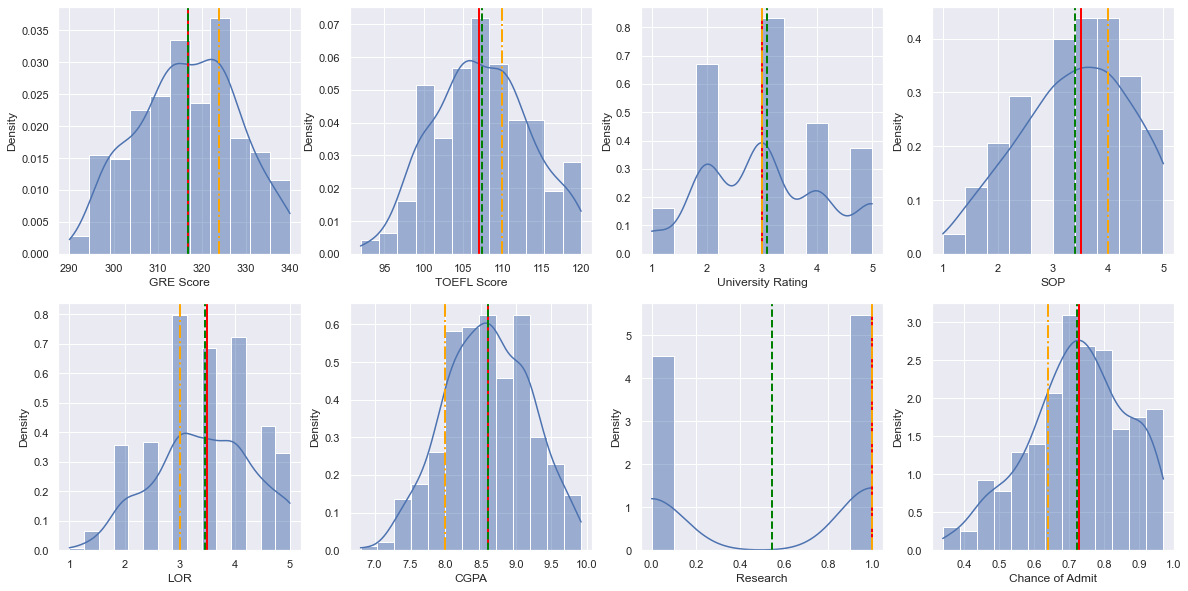

In [12]:
# Create a figure with 2 rows and 4 columns
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Plot the histogram for each column
for i in range(len(data.columns)):
    # Get column name
    name = data.columns[i]
    # Get row and column index for the subplot
    x = i % 4
    y = i // 4
    # Plot the histogram
    sns.histplot(data[name], ax=ax[y,x], kde=True, stat='density')
    # Plot the median value
    ax[y,x].axvline(x=data[name].median(), color='red', linestyle='-', linewidth=2)
    # Plot the mean value
    ax[y,x].axvline(x=data[name].mean(), color='green', linestyle='--', linewidth=2)
    # Plot the max mode value
    ax[y,x].axvline(x=data[name].mode().max(), color='orange', linestyle='-.', linewidth=2)

#### Box Plot

Box plot is a good way to visualize the distribution of the data. We can see the median, mean, minimum and maximum values as well as the outliers.

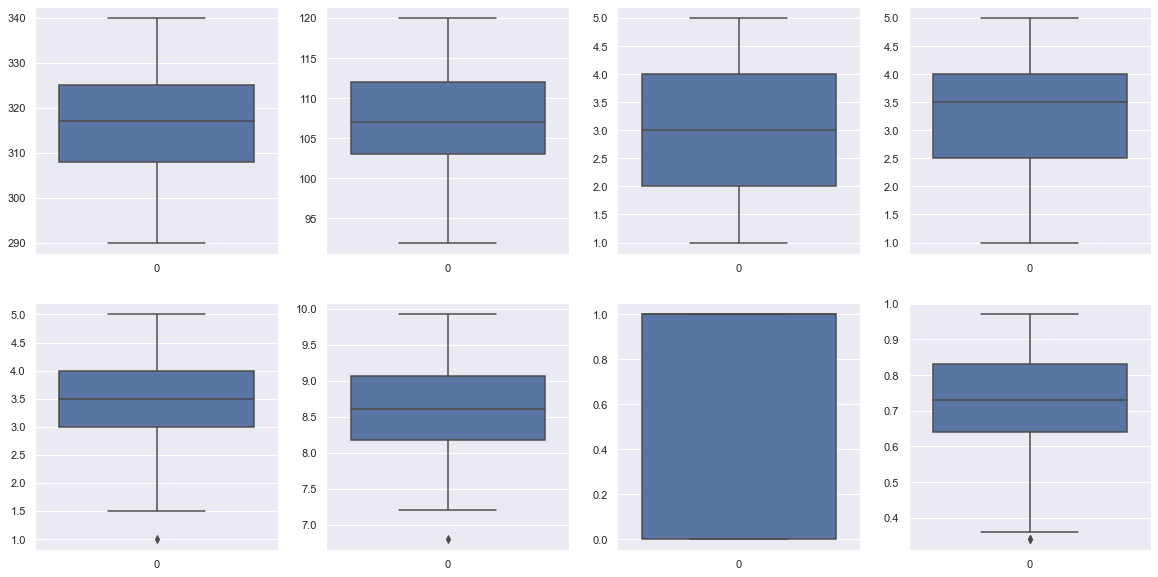

In [13]:
# Create a figure with 2 rows and 4 columns
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Plot the boxplot for each column
for i in range(len(data.columns)):
    # Get column name
    name = data.columns[i]
    # Get row and column index for the subplot
    x = i % 4
    y = i // 4
    # Plot the boxplot
    sns.boxplot(data[name], ax=ax[y,x])

#### Pair Plot

Pair plots are used to visualize how the features are related to each other. A more linear relationship between the features means that the features are more correlated, and a more scattered relationship means that the features are less correlated.

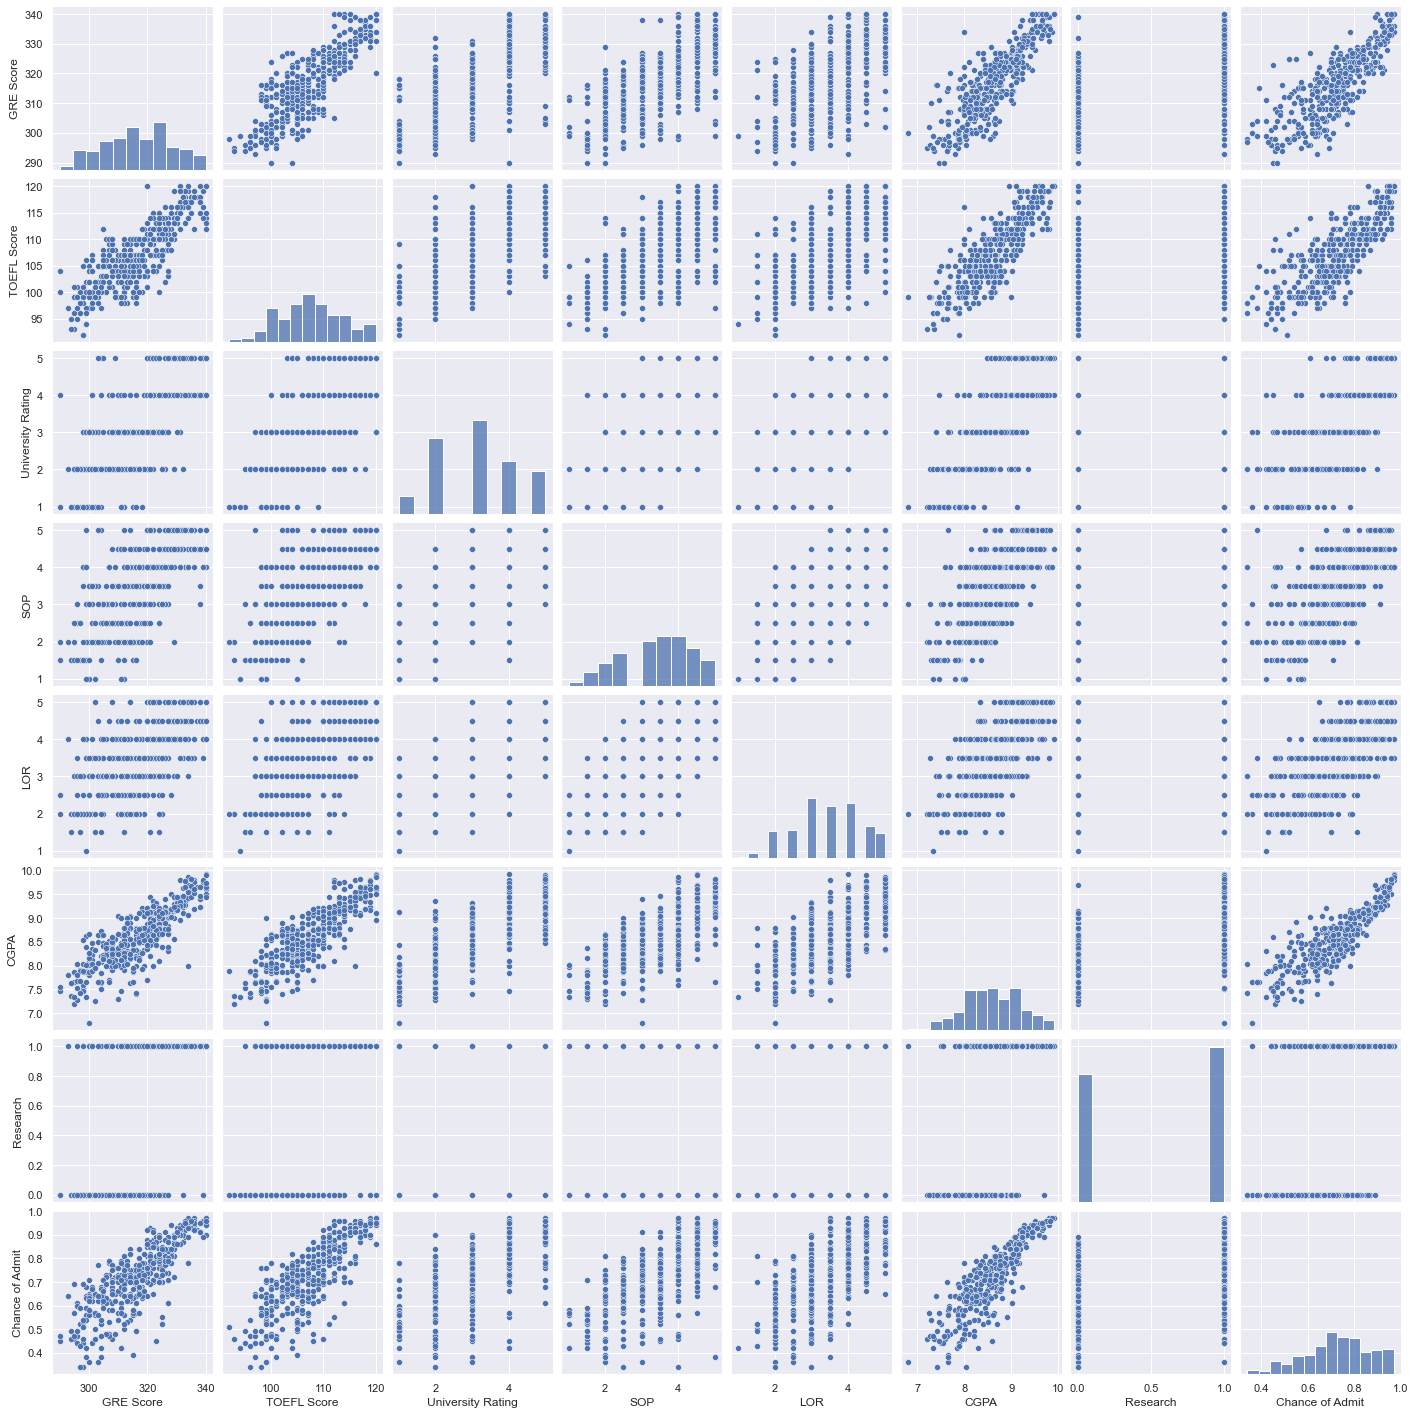

In [14]:
# Pair plot of all columns
sns.pairplot(data)

#### Correlation Matrix

The correlation matrix is a very important visualization tool. It shows the correlation between the columns. The correlation can be positive or negative. A positive correlation means that the features are positively related to each other, and a negative correlation means that the features are negatively related to each other. If the correlation is close to 0, it means that the features are not correlated at all.

<AxesSubplot:>

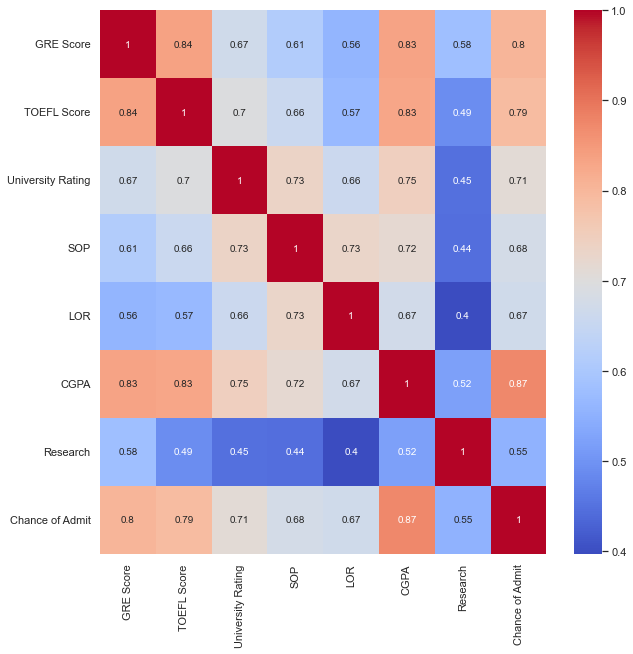

In [15]:
# Create a figure with a certain size
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the heatmap (correlation matrix)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)

## Probability and Statistics

### Estimation of the unconditional and conditional probabilities

#### Unconditional Probability

Unconditional probability is the probability of an event occurring without any other events being taken into account. It is calculated by dividing the number of times the event occurs by the total number of times the event can occur.

$$P(A) = \frac{N(A)}{N}$$

<AxesSubplot:title={'center':'University Rating'}, xlabel='Rating', ylabel='Probability'>

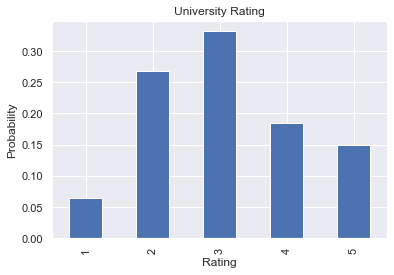

In [16]:
# Check the probability of picking a random student from each university rating category.

# Sum up the number of students for each university rating category and divide by the total number of students
P_uni_rating = data['University Rating'].value_counts() / data['University Rating'].count()

# Sort the indexes
P_uni_rating.sort_index(inplace=True)

# Plot a bar chart
P_uni_rating.plot(kind='bar', title='University Rating', xlabel='Rating', ylabel='Probability')

#### Conditional Probability

Conditional probability is the probability of an event occurring given that another event has already occurred. It is calculated by dividing the number of times both event occurs by the number of times the other event occurs.

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

In [17]:
# Checking conditional probability that a student from a highly rated university will have a high GPA.

# Create a subset of the data with only students from highly rated universities (4 or 5)
c_data_uni_rating = data[data['University Rating'] > 3]

# Calculate the probability of having a high GPA (above 8.5) for students from highly rated universities
CP_gpa = sum(c_data_uni_rating['CGPA'] >= 8.5) / len(c_data_uni_rating)

# Print the result
print(f"The probability that a student from a highly rated university will have a high GPA is {CP_gpa:.2f}.")

The probability that a student from a highly rated university will have a high GPA is 0.92.


In [18]:
# Check conditional probability that a student with a high GPA is fro a highly rated university.

# Create a subset of the data with only students with a high GPA (above 8.5)
c_data_gpa = data[data['CGPA'] >= 8.5]

# Calculate the probability of being from a highly rated university for students with a high GPA
CP_uni_rating = sum(c_data_gpa['University Rating'] > 3) / len(c_data_gpa)

# Print the result
print(f"The probability that a student with a high GPA will be from a highly rated university is {CP_uni_rating:.2f}.")

The probability that a student with a high GPA will be from a highly rated university is 0.55.


### Estimation of the parameters of distributions of single variables (mathematical expectation, variance, standard deviation, median, quartiles, quantiles,...)

#### Mathematical Expectation

Mathematical expectation is the average value of a random variable. It is calculated by multiplying the value of the random variable by the probability of that value occurring and then summing all the values.

$$E(X) = \sum_{i=1}^{n}x_iP(X=x_i)$$

In [19]:
# Mathematical expectation of each column
exp = data.mean()

# Print the result
print(f"The mathematical expectation of each variable is:\n{exp.round(2)}")

The mathematical expectation of each variable is:
GRE Score            316.81
TOEFL Score          107.41
University Rating      3.09
SOP                    3.40
LOR                    3.45
CGPA                   8.60
Research               0.55
Chance of Admit        0.72
dtype: float64


#### Variance

Variance is the average of the squared differences from the mean. It is calculated by subtracting the mean from each value, squaring the result and then dividing the sum of the squared differences by the number of values.

$$ Var(X) = \sum_{i=1}^{n}(x_i - E(X))^2P(X = x_i)$$

In [20]:
# Variance of each column
var = data.var()

# Print the result
print(f"The variance of each variable is:\n{var.round(2)}")

The variance of each variable is:
GRE Score            131.64
TOEFL Score           36.84
University Rating      1.31
SOP                    1.01
LOR                    0.81
CGPA                   0.36
Research               0.25
Chance of Admit        0.02
dtype: float64


#### Standard Deviation

Standard deviation is the square root of the variance. It is calculated by taking the square root of the variance. It is used to measure how spread out the values are.

$$ \sigma = \sqrt{Var(X)}$$

In [21]:
# Standard deviation of each column
std = data.std()

# Print the result
print(f"The standard deviation for each variable is:\n{std.round(2)}.")

The standard deviation for each variable is:
GRE Score            11.47
TOEFL Score           6.07
University Rating     1.14
SOP                   1.01
LOR                   0.90
CGPA                  0.60
Research              0.50
Chance of Admit       0.14
dtype: float64.


#### Median

Median is the middle value of a sorted list of values. It is calculated by sorting the values and then taking the middle value. If there are an even number of values, the median is the average of the two middle values.

Half of the values are below the median and half of the values are above the median.

In [22]:
# Median of each column
median = data.median()

# Print the result
print(f"The median for each variable is:\n{median}.")

The median for each variable is:
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64.


#### Quartiles

Quartiles are the values that divide the data into four equal parts. The first quartile is the median of the lower half of the data. The second quartile is the median of the data. The third quartile is the median of the upper half of the data.

In [23]:
# Quartiles of each column
quant = data.quantile([0.25, 0.5, 0.75]).transpose()

# Print the result
print(f"The quartiles for each variable are:")
quant

The quartiles for each variable are:


,0.25,0.50,0.75
GRE Score,308.00,317.00,325.0000
TOEFL Score,103.00,107.00,112.0000
University Rating,2.00,3.00,4.0000
SOP,2.50,3.50,4.0000
LOR,3.00,3.50,4.0000
CGPA,8.17,8.61,9.0625
Research,0.00,1.00,1.0000
Chance of Admit,0.64,0.73,0.8300


### Estimation of the parameters of the joint distribution of two variables (covariance, correlation coefficient)

#### Covariance

Covariance is a measure of how much two variables change together. It is calculated by subtracting the mean of one variable from each value, multiplying the result by the difference between the mean of the other variable and each value and then dividing the sum of the products by the number of values.

$$ Cov(X,Y) = \sum_{i=1}^{n}(x_i - E(X))(y_i - E(Y))P(X = x_i, Y = y_i)$$

In [24]:
# Covariance matrix
cov = data.cov()

# Print the result
print(f"The covariance matrix is:")
cov

The covariance matrix is:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.318690,1.313271
TOEFL Score,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.481729,0.685179
University Rating,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.255232,0.116009
SOP,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.222807,0.097028
LOR,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.177701,0.085834
CGPA,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.155026,0.074265
Research,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.248365,0.039317
Chance of Admit,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.039317,0.020337


#### Correlation Coefficient

Correlation coefficient is a normalized version of covariance. It is calculated by dividing the covariance by the product of the standard deviations of the two variables.

$$ \rho(X,Y) = \frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$

In [25]:
# Correlation matrix
corr = data.corr()

# Print the result
print(f"The correlation matrix is:")
corr

The correlation matrix is:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


### Estimation of the PDF based on histogram and nonparametric hypothesis testing of distributions using Kolmogorov-Smirnov and/or chi-squared test

We should determine the level of significance for the test. The level of significance is the probability of rejecting the null hypothesis when it is true. The level of significance is usually 0.05 or 0.01.

Hypothesis 0 (NULL hypothesis): samples are from a normal distribution

Hypothesis 1 (Alternative hypothesis): samples are not from a normal distribution

If we get a value less than our level of significance, we reject the null hypothesis and accept the alternative hypothesis. If we get a value greater than our level of significance, we accept the null hypothesis and reject the alternative hypothesis.

In [26]:
# Extract the target variable
test_data = data['GRE Score']

# Take 100 values from the target variable
sample = test_data.sample(100)

#### Kolmogorov-Smirnov test

Kolmogorov-Smirnov test is a nonparametric test used to determine if two samples come from the same distribution. The test is based on the maximum distance between the cumulative distribution functions of the two samples. 

In [27]:
# Mean and standard deviation of the sample used to form the normal distribution
mean = sample.mean()
std = sample.std()

# Using Kolmogorov-Smirnov test to check if the sample comes from a normal distribution
p_val = stats.kstest(sample, cdf='norm', args=(mean, std)).pvalue

# Print the result
print(f"p-value: {p_val:.2f}")

p-value: 0.57


#### Chi-squared test

Chi-squared test is a nonparametric test used to determine if two samples come from the same distribution. The test is based on the sum of the squared differences between the expected and observed frequencies in each category.

In [28]:
# Using Chi-Square test to check if the sample comes from a normal distribution
p_val = stats.chisquare(sample).pvalue

# Print the result
print(f"p-value: {p_val:.2f}")

p-value: 1.00


#### Q-Q plot

Quantile-quantile plot is a graphical method for comparing two probability distributions by plotting their quantiles against each other. If the two distributions are the same, the resulting points will approximately form a straight line.

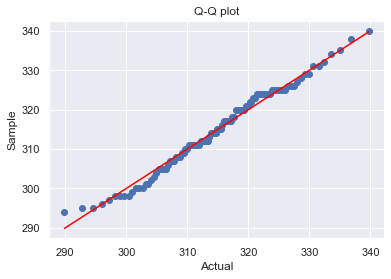

In [29]:
# Generate a normal distribution with the same mean and standard deviation as the sample
norm = stats.norm(loc=mean, scale=std)

# Generate the Percent Point Function (PPF) for the normal distribution
norm_ppf = norm.ppf(np.linspace(0.01, 0.99, 100))

# Scatter the sample in relation to the PPF
plt.scatter(norm_ppf, np.sort(sample))

# Get the X axis from the ppf
x = np.linspace(np.min(norm_ppf), np.max(norm_ppf), 100)

# Plot a line which is equal to y=x
plt.plot(x, x, color='red')

# Set title and labels
plt.title('Q-Q plot')
plt.xlabel('Actual')
plt.ylabel('Sample')

# Show the plot
plt.show()

### Estimation of confidence intervals of certain parameters

Confidence interval is a range of values that we are a certain percentage sure that the true value of the parameter lies in. We can calculate the confidence interval by using the t-distribution.

In [30]:
# Function that calculates the confidence interval for a given sample with a given confidence level
def confidenceIntervalMathExp(samples, level):
    # Alpha value
    alpha = 1 - level

    # Mean of the sample
    mean = samples.mean()

    # Calculate the quantile order
    order = 1 - alpha / 2

    # Calculate the quantile
    Q = stats.t.ppf(order, df=len(samples) - 1)

    # Calculate the standard error
    margin = Q * (samples.std()/np.sqrt(len(samples)))

    # Calculate the confidence interval
    interval = (mean - margin, mean + margin)

    # Return the confidence interval (lower bound, upper bound)
    return interval

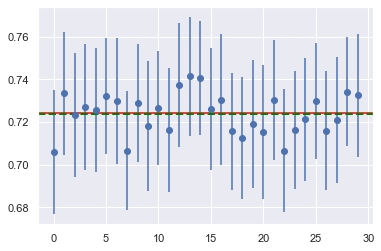

In [31]:
# Number of generated sets
N_sets = 30
# Number of samples in each set
N_samples = 100

# Sets of samples
sets = []

# Generate the sets of samples
for i in range(N_sets):
    sets.append(data.sample(N_samples))

# Confidence intervals for each set
CIs = []

# Calculate the confidence intervals for each set
for i in range(N_sets):
    CIs.append(confidenceIntervalMathExp(sets[i]['Chance of Admit'], 0.95))

# Plot the confidence intervals
plt.errorbar(x = np.arange(len(CIs)), y = [np.mean(CI) for CI in CIs], yerr = [(up-down)/2 for up, down in CIs], fmt='o')

# Get the expected value of the target variable
exp = data['Chance of Admit'].mean()

# Plot the expected value
plt.axhline(y=exp, color='red')

# Plot the average of the confidence intervals
plt.axhline(y=np.mean(CIs), color='green', linestyle='--', lw=2)

### Parametric hypothesis testing

Parametric hypothesis testing is used to determine if two samples come from the same distribution. The test is based on the difference between the means of the two samples.

In [32]:
# Extract the target variable
test_data = data['GRE Score']

# Number of samples to be generated
N_samples = 100

# Median and standard deviation of the normal distribution
mean = test_data.mean()
std = test_data.std()

# Get random samples from the data
sample = test_data.sample(N_samples)

# Find the average of the sample
avg = sample.mean()

In [33]:
# Confidence level
alpha = 0.05

# Generate confidence interval from the normal distribution
CI = stats.t.interval(1 - alpha, df=N_samples - 1, loc=avg, scale=std/np.sqrt(N_samples))

# Print the average and the confidence interval
print(f"Sample mean: {avg:.2f}")
print(f"Confidence interval: {CI}")

Sample mean: 316.10
Confidence interval: (313.8233796885981, 318.37662031140195)


In [34]:
# Calculate the margin of error
margin = np.abs(avg - mean)

# Calculate the quantile
Q = margin * (np.sqrt(N_samples)) / std

# Calculate the p-value
p_val = 2 * (1 - stats.t.cdf(Q, df=N_samples - 1))

# Print the result
print(f"p-value: {p_val:.2f}")

p-value: 0.54


## Linear Regression

Linear regression is a statistical method used to find the relationship between two variables. The relationship is modeled using a linear function. The linear function is a straight line that passes through the origin. The linear function is represented by the equation:

$$y = mx + b$$

In [35]:
# Rename the columns for use in the model
data2 = data.rename({
    'GRE Score': 'GRE',
    'TOEFL Score': 'TOEFL',
    'University Rating': 'UR',
    'SOP': 'SOP',
    'LOR ': 'LOR',
    'CGPA': 'CGPA',
    'Research': 'Research',
    'Chance of Admit': 'Admit'
}, axis=1)

#### Between two variables

In [36]:
# Create a linear model with Admit target variable and GRE as the only feature
M1 = sm.ols("Admit ~ CGPA", data2).fit()

print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Admit   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1279.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          2.34e-126
Time:                        17:43:21   Log-Likelihood:                 499.61
No. Observations:                 400   AIC:                            -995.2
Df Residuals:                     398   BIC:                            -987.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0715      0.050    -21.285      0.0

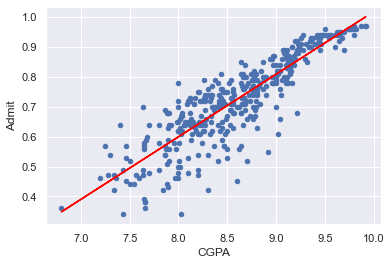

In [37]:
data2.plot('CGPA', 'Admit', kind='scatter')
plt.plot(data2['CGPA'], M1.fittedvalues, color='red')
plt.show()

#### Between multiple variables

In [38]:
M2 = sm.ols("Admit ~ GRE + TOEFL + CGPA + LOR", data2).fit()

print(M2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Admit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     389.9
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          1.12e-135
Time:                        17:43:21   Log-Likelihood:                 531.78
No. Observations:                 400   AIC:                            -1054.
Df Residuals:                     395   BIC:                            -1034.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4631      0.106    -13.836      0.0

In [39]:
M3 = sm.ols("Admit ~ GRE * TOEFL * CGPA * LOR", data2).fit()

print(M3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Admit   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          1.06e-123
Time:                        17:43:21   Log-Likelihood:                 533.31
No. Observations:                 400   AIC:                            -1035.
Df Residuals:                     384   BIC:                            -970.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -54.7383     79

#### Polynomial regression

In [40]:
M4 = sm.ols("Admit ~ GRE + TOEFL + I(CGPA**2) + I(GRE**3) + I(TOEFL**3)", data2).fit()

print(M4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Admit   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     288.8
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          2.57e-129
Time:                        17:43:22   Log-Likelihood:                 519.98
No. Observations:                 400   AIC:                            -1028.
Df Residuals:                     394   BIC:                            -1004.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.5412      1.604     -1.585